In [1]:
import sys
import outliers
import pandas as pd
import matplotlib.pyplot as plt
from outliers import ddc_outlier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
import numpy as np

import warnings
warnings.filterwarnings('ignore')

prescription = pd.read_csv('../data/prescriptions_subdose.csv.gz', compression='gzip')

In [2]:
medications = outliers.getOverdoseMedications(prescription)
medications.shape

(74,)

In [3]:
ep_range = np.arange(0.01,1.0,0.01)
results, max_f = outliers.runParameterSearch(prescription, np.asarray(medications), ep_range)

ABACAVIR 300 mg CP, , (IsoF+0.03), 0.0831758034026465, , (DDC+0.91), 1.0, , (DDC-J+0.04), 1.0, 
ACICLOVIR 200 mg CP, , (IsoF+0.03), 0.696132596685083, , (DDC+0.9500000000000001), 0.36416184971098264, , (DDC-J+0.42000000000000004), 0.36416184971098264, 
ALOPURINOL 100 mg CP, , (IsoF+0.01), 0.14457831325301204, , (DDC+0.91), 0.4946236559139785, , (DDC-J+0.04), 0.6388888888888888, 
AMITRIPTILINA 25 mg CP, , (IsoF+0.04), 0.06354515050167225, , (DDC+0.9), 1.0, , (DDC-J+0.02), 0.5507246376811594, 
AMOXICILINA + CLAVULANATO 500 mg + 125 mg CP, , (IsoF+0.01), 0.5915492957746479, , (DDC+0.91), 0.6341463414634146, , (DDC-J+0.08), 0.8813559322033898, 
AMPICILINA + SULBACTAM 2 g + 1 g SOL INJ, , (IsoF+0.03), 0.7800829875518672, , (DDC+0.92), 1.0, , (DDC-J+0.25), 0.8032564450474898, 
AMPICILINA 1000 mg SOL INJ - SEM DILUENTE, , (IsoF+0.14), 0.8835489833641405, , (DDC+0.98), 0.5515587529976019, , (DDC-J+0.56), 0.5515587529976019, 
ANLODIPINO 10 mg CP, , (IsoF+0.01), 0.9886792452830189, , (DDC+0.92),

In [4]:
display(results)

,Time,Accuracy,Recall,Precision,F-Measure
IsoF,0.410098,0.961597,0.910708,0.536698,0.614870
DDC,0.047745,0.956842,0.860390,0.507756,0.584763
DDC-J,0.036804,0.962573,0.904127,0.611907,0.687436


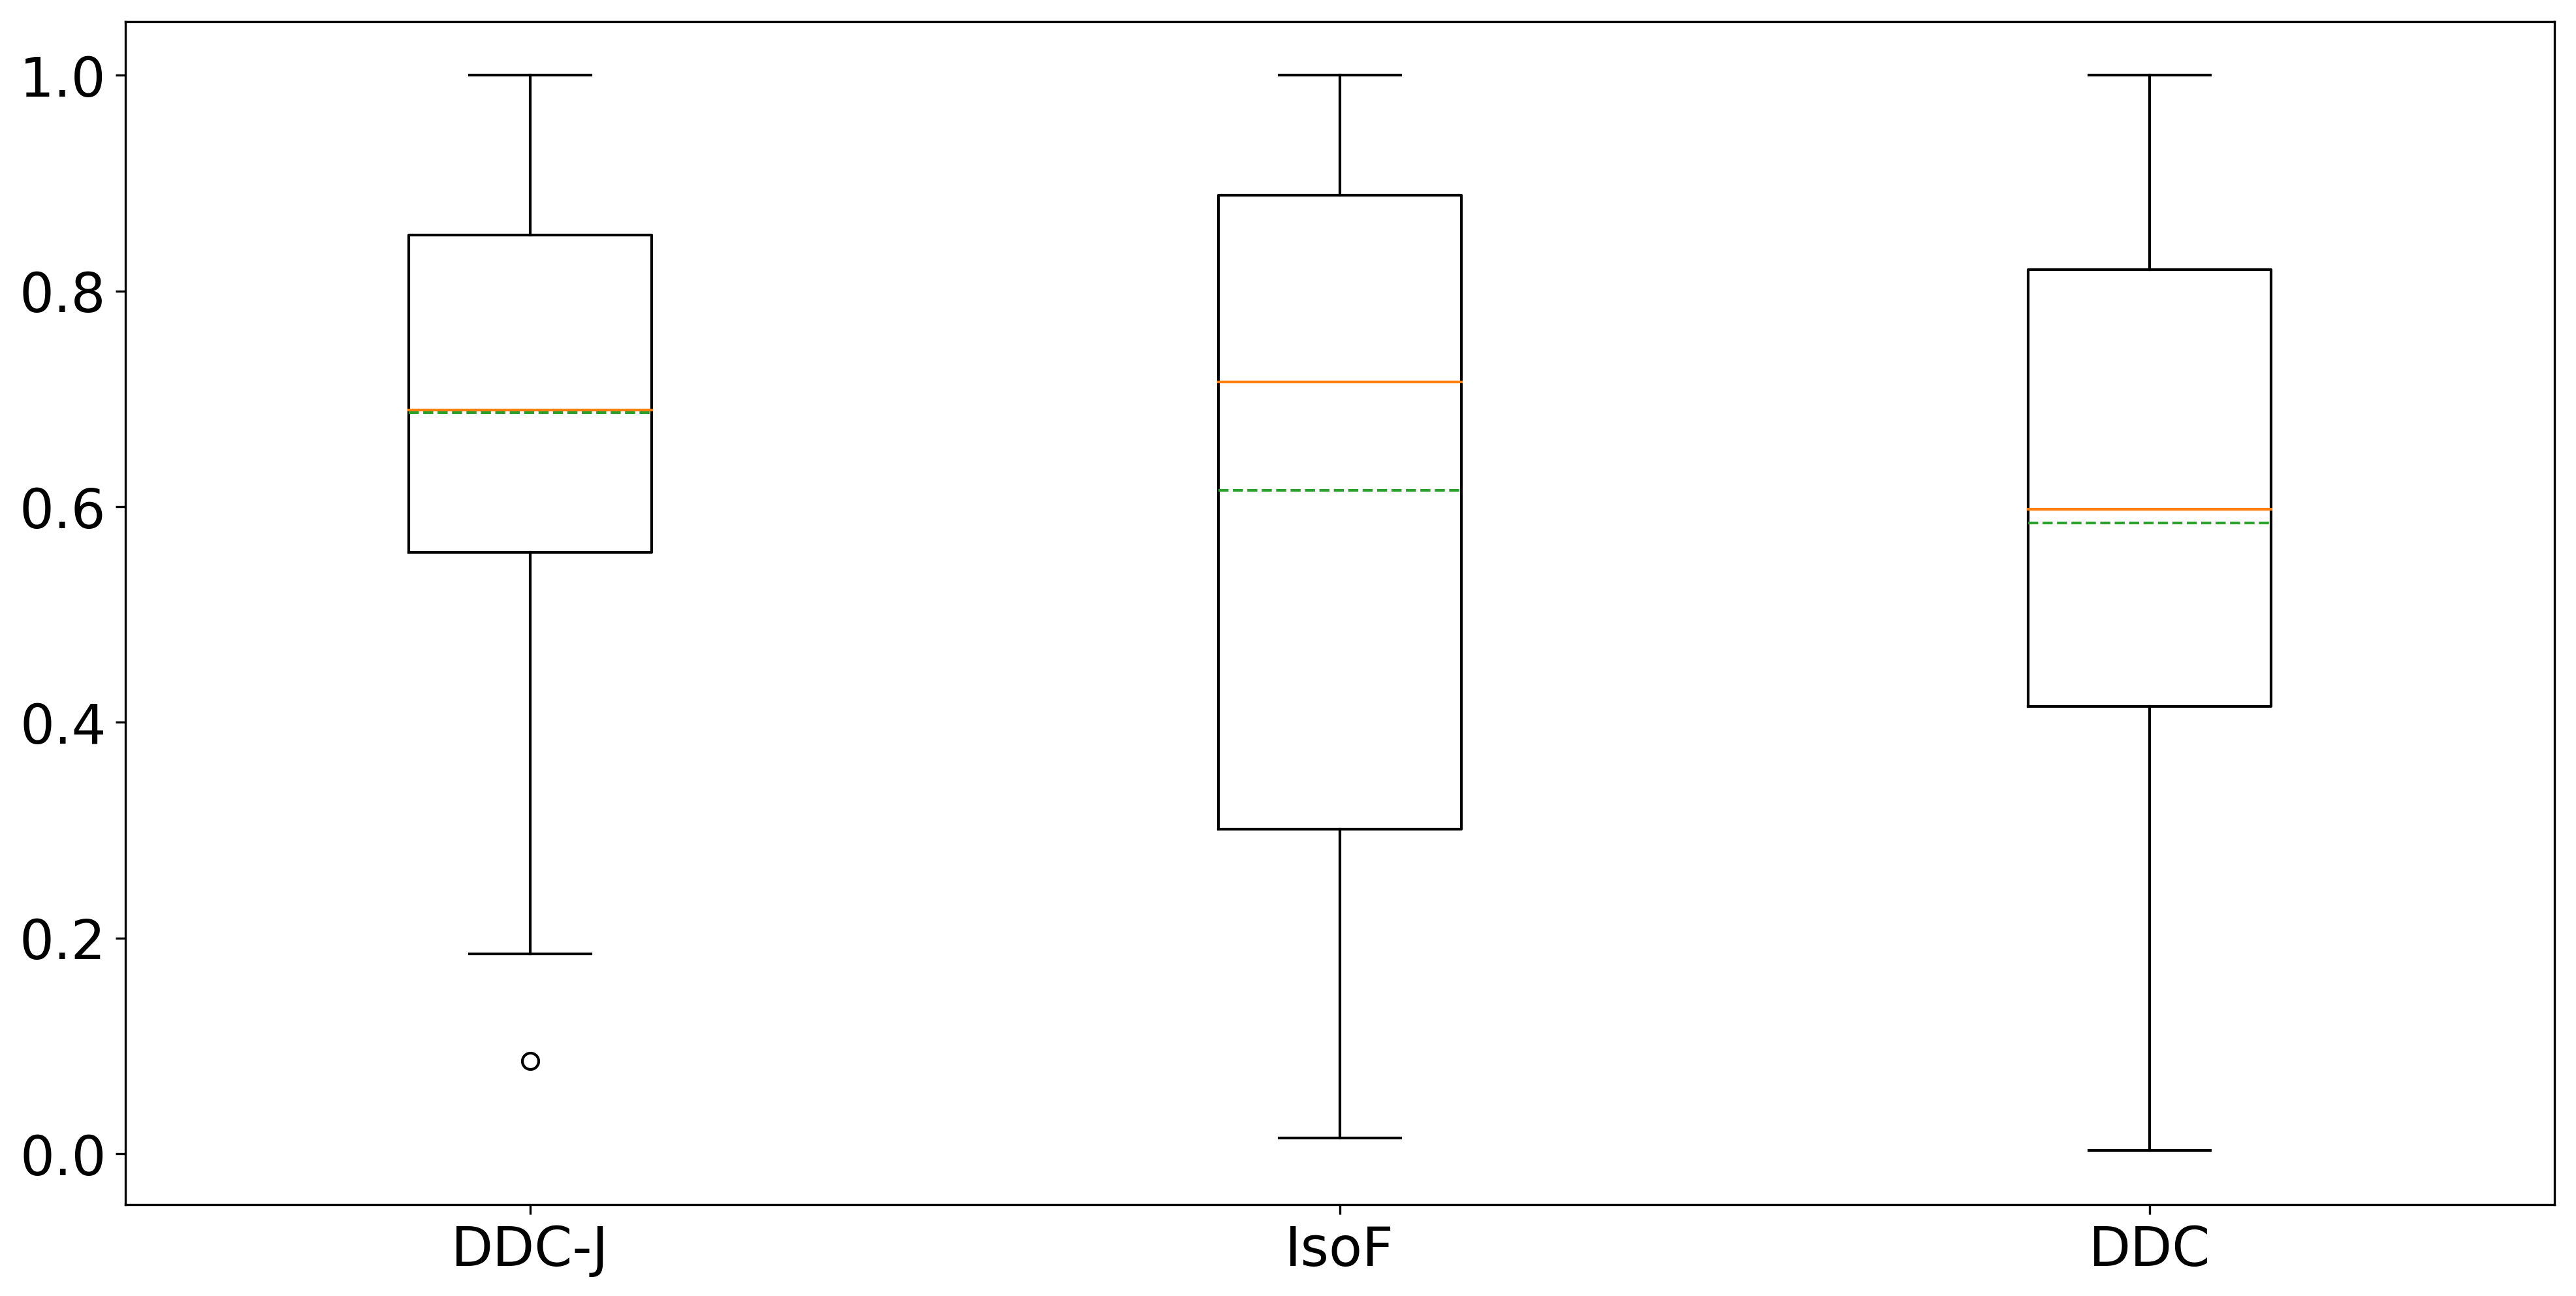

In [16]:
#%matplotlib inline
from matplotlib import rcParams

labelsize = 20
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

plt.figure(figsize=(16, 8), dpi= 300)

data = []

data.append(max_f.loc['DDC-J'].values)
data.append(max_f.loc['IsoF'].values)
data.append(max_f.loc['DDC'].values)    

labels = ['DDC-J','IsoF','DDC']

plt.boxplot(data, labels=labels, showmeans=True, meanline=True)

#plt.show()

plt.savefig('boxplot.eps', format='eps', dpi=300, bbox_inches='tight')